In [261]:
import pandas as pd
import ast 
import collections
import operator
import numpy as np

In [262]:
!ls -lh -S main_product/ | head -5

total 18064
-rwxr-xr-x@ 1 kushthaker  staff   694K 12 Nov 14:49 B06ZZ65855.csv
-rwxr-xr-x@ 1 kushthaker  staff   665K 12 Nov 11:16 B010ESCLHW.csv
-rwxr-xr-x@ 1 kushthaker  staff   663K 12 Nov 11:53 B00I14HLLS.csv
-rwxr-xr-x@ 1 kushthaker  staff   558K 12 Nov 15:05 B00OH5MIPO.csv


In [263]:
df1 = pd.read_csv('main_product/B001NZO85O.csv')
df2 = pd.read_csv('main_product/B00OH5MIPO.csv')

In [264]:
df1.columns == df2.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

In [265]:
!ls main_product/ > lights.txt

In [266]:
with open('lights.txt','r') as l:
    csvs = [f.strip() for f in l.read().split('\n') if f != '']
    
df = pd.read_csv('main_product/' + csvs[0])
    
for csv in csvs[1:]:
    df = pd.concat([df, pd.read_csv('main_product/' + csv)])

In [267]:
import sys; print(sys.getsizeof(df) * 1.e-6, 'MB')

18.43407 MB


list of helper functions for `df_products`

In [268]:
def get_mass(dim_string):
    if dim_string == 0:
        return 0.00
    else:
        grams = np.array(dim_string.split(';')[1].split(' ')[1]).astype(np.float)
        grams = np.prod(grams)
        return np.around(grams,2)

def get_volume(dim_string):
    if dim_string == 0:
        return 0.00
    # get density of flashlight in grams / m^3 
    else:
        dims = [dim.strip() for dim in dim_string.split(';')[0].split('x')]
        dims[-1] = dims[-1][:-3]
        dims = np.array(dims).astype(np.float)
        volume_m = np.prod(dims) / 100 # convert metres
        return np.around(volume_m,2)
    
def convert_meta_to_dict(row):
    row['meta'] = ast.literal_eval(row.meta)
    return row

def add_mass(row):
    row['mass'] = get_mass(row.meta.get('product dimensions',0))
    return row

def add_volume(row):
    row['volume'] = get_volume(row.meta.get('product dimensions',0))
    return row

def get_price(row):
    row['price'] = df.loc[df.product_id == row.id, ['price']].values[0][0].astype(np.float)
    return row

def get_rating(row):
    row['rating'] = df.loc[df.product_id == row.id, ['average_rating']].values[0][0].astype(np.float)
    return row

def get_image_url(row):
    row['image_url'] = df.loc[df.product_id == row.id, ['product_image_url']].values[0][0]
    return row

In [269]:
df_products = pd.DataFrame({'id':df.product_id.unique(), 
                            'product':df.product_name.unique(), 
                            'meta':[meta for meta in df.meta_data.unique() if type(meta) == str ]
                           })

In [270]:
df_products = df_products.apply(get_price, axis=1)
df_products = df_products.apply(get_rating, axis=1)
df_products = df_products.apply(get_image_url, axis=1)
df_products = df_products.apply(convert_meta_to_dict, axis=1)
df_products = df_products.apply(add_mass, axis=1)
df_products = df_products.apply(add_volume, axis=1)

In [271]:
df_products

,id,product,meta,price,rating,image_url,mass,volume
0,B001NZO85O,Fenix Flashlight Headband (Fits Lights with 18...,{'product dimensions': '10 x 10 x 10 cm; 68.04...,36.47,4.2,https://images-na.ssl-images-amazon.com/images...,68.04,10.00
1,B005CWRB44,Fenix Compact 140 Lumen Flashlight,"{'item weight': '0.81 Ounces', 'number of piec...",81.71,4.0,https://images-na.ssl-images-amazon.com/images...,0.00,0.00
2,B0062PVSGW,Fenix Pd32-R5 Cree Xp-G Led Flashlight,{'product dimensions': '2.4 x 12.7 x 2.4 cm; 6...,129.65,4.5,https://images-na.ssl-images-amazon.com/images...,60.95,0.73
3,B0091TRPVI,Fenix E25 Flashlight-187 Lumens,{'product dimensions': '2.4 x 14.6 x 2.4 cm; 7...,118.45,3.9,https://images-na.ssl-images-amazon.com/images...,73.71,0.84
4,B00937X7G0,Nitecore MT2A CREE XP-G R5 LED 280 Lumen Multi...,"{'manufacturer': 'Nitecore', 'part number': 'M...",59.94,4.2,https://images-na.ssl-images-amazon.com/images...,66.90,0.78
...,...,...,...,...,...,...,...,...
85,B0841RSDCR,Nitecore E4K 4400 Lumen high powered Flashligh...,"{'manufacturer': 'Nitecore Flashlights', 'parc...",110.00,4.5,https://images-na.ssl-images-amazon.com/images...,0.00,0.00
86,B086PW9TTP,"ACEBEAM E10 LED Flashlight, 760 Lumens, Long T...","{'manufacturer': 'ZENBON', 'part number': 'E10...",73.55,4.5,https://images-na.ssl-images-amazon.com/images...,148.00,1.08
87,B087CG1YW6,Fenix PD40R v2 3000 Lumen Mechanical Rotary Sw...,"{'manufacturer': 'Fenix Flashlights', 'part nu...",NaN,4.5,https://images-na.ssl-images-amazon.com/images...,117.08,1.19
88,B08BTQ2T4C,Fenix E03R 260 Lumen Rechargeable EDC Keychain...,"{'manufacturer': 'Fenix Flashlights', 'part nu...",NaN,4.9,https://images-na.ssl-images-amazon.com/images...,22.11,0.13


next steps get manual df

In [293]:
df_manual = pd.read_csv('j2-urls.csv')
df_manual = df_manual[['Size','Max Throw (yards)','Lumen','Brand','Product','Link']]
df_manual = df_manual.loc[df_manual['Link'].isna() == False]

In [294]:
import re

pattern = re.compile(r'/([a-zA-Z0-9]{10})(?:[/?]|$)')

def get_asin(url):
    asin = ([m.group(0) for m in pattern.finditer(url)][0]).replace('/','')
    return asin

def add_asin(row):
    row['id'] = get_asin(row.Link)
    return row

In [295]:
df_manual = df_manual.apply(add_asin, axis=1)
print('len df_manual: ', len(df_manual)) 
print('len df_products: ', len(df_products))

len df_manual:  83
len df_products:  90


In [296]:
df_final = pd.merge(df_products, df_manual, how='left', on='id')
print('len merged: ', len(df_final))
df_final = df_final.dropna()
print('len w dropna(): ', len(df_final))

len merged:  92
len w dropna():  63


In [297]:
df_final = df_final.rename(columns={'Size':'size',
                                          'Lumen':'lumens',
                                          'Max Throw (yards)':'throw_yards',
                                          'Brand':'brand',
                                          'Product':'model',
                                          'Link':'page_url'})
df_final.columns

Index(['id', 'product', 'meta', 'price', 'rating', 'image_url', 'mass',
       'volume', 'size', 'throw_yards', 'lumens', 'brand', 'model',
       'page_url'],
      dtype='object')

In [298]:
def get_lumens(row):
#     if '?' in row.lumens:
#         row.lumens = row.lumens.replace('?','')
    row.lumens = np.array(row.lumens).astype(np.float)
    return row

def get_throw_yards(row):
#     if '?' in row.throw_yards:
#         row.throw_yards = row.throw_yards.replace('?','')
    row.throw_yards = np.array(row.throw_yards).astype(np.float)
    return row

def get_label(row):
    row['label'] = row['brand'] + ' ' + row['model']
    return row

In [299]:
df_final = df_final.apply(get_lumens, axis=1)
df_final = df_final.apply(get_throw_yards, axis=1)
df_final = df_final.apply(get_label, axis=1)

In [300]:
df_final = df_final[['id',
                     'brand',
                     'model',
                     'label',
                     'product',
                     'meta',
                     'price', 
                     'lumens', 
                     'throw_yards',
                     'rating',
                     'size',
                     'mass',
                     'volume',
                     'image_url',
                     'page_url'
                    ]]

In [301]:
df_final

,id,brand,model,label,product,meta,price,lumens,throw_yards,rating,size,mass,volume,image_url,page_url
1,B005CWRB44,Fenix,E15,Fenix E15,Fenix Compact 140 Lumen Flashlight,"{'item weight': '0.81 Ounces', 'number of piec...",81.71,170.0,142.0,4.0,Small-Pocket,0.00,0.00,https://images-na.ssl-images-amazon.com/images...,https://www.amazon.ca/Fenix-Compact-140-Lumen-...
2,B0062PVSGW,Fenix,Pd32-R5,Fenix Pd32-R5,Fenix Pd32-R5 Cree Xp-G Led Flashlight,{'product dimensions': '2.4 x 12.7 x 2.4 cm; 6...,129.65,315.0,168.0,4.5,Small/Medium,60.95,0.73,https://images-na.ssl-images-amazon.com/images...,https://www.amazon.ca/Fenix-Pd32-R5-Cree-Xp-G-...
3,B0091TRPVI,Fenix,E25,Fenix E25,Fenix E25 Flashlight-187 Lumens,{'product dimensions': '2.4 x 14.6 x 2.4 cm; 7...,118.45,187.0,218.0,3.9,Medium-EDC,73.71,0.84,https://images-na.ssl-images-amazon.com/images...,https://www.amazon.ca/Fenix-Flashlights-E25R4B...
4,B00937X7G0,Nitecore,MT1A,Nitecore MT1A,Nitecore MT2A CREE XP-G R5 LED 280 Lumen Multi...,"{'manufacturer': 'Nitecore', 'part number': 'M...",59.94,345.0,166.0,4.2,Medium-EDC,66.90,0.78,https://images-na.ssl-images-amazon.com/images...,https://www.amazon.ca/Nitecore-MT2A-Lumen-Mult...
5,B00937YE6C,Nitecore,MT1C,Nitecore MT1C,NiteCore CREE XP-G R5 MT1C Multitask LED Flash...,{'product dimensions': '8.79 x 2.34 x 2.34 cm;...,53.99,280.0,125.0,4.2,Medium-EDC,18.14,0.48,https://images-na.ssl-images-amazon.com/images...,https://www.amazon.ca/NiteCore-CREE-Multitask-...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,B07YXRYCH7,Acebeam,PT10-GT,Acebeam PT10-GT,"ACEBEAM PT10-GT Pen Light Flashlight, SAMSUNG ...","{'manufacturer': 'ZENBON', 'part number': 'PT1...",51.46,400.0,78.0,4.6,Medium-EDC,41.96,0.31,https://images-na.ssl-images-amazon.com/images...,https://www.amazon.ca/ACEBEAM-PT10-GT-Produces...
86,B0841RSDCR,Nitecore,E4K,Nitecore E4K,Nitecore E4K 4400 Lumen high powered Flashligh...,"{'manufacturer': 'Nitecore Flashlights', 'parc...",110.00,4400.0,230.0,4.5,Medium-EDC,0.00,0.00,https://images-na.ssl-images-amazon.com/images...,https://www.amazon.ca/Nitecore-Flashlight-rech...
87,B0841RSDCR,Nitecore,E4K,Nitecore E4K,Nitecore E4K 4400 Lumen high powered Flashligh...,"{'manufacturer': 'Nitecore Flashlights', 'parc...",110.00,4400.0,230.0,4.5,Medium-EDC,0.00,0.00,https://images-na.ssl-images-amazon.com/images...,https://www.amazon.ca/Nitecore-Flashlight-rech...
88,B086PW9TTP,Acebeam,E10,Acebeam E10,"ACEBEAM E10 LED Flashlight, 760 Lumens, Long T...","{'manufacturer': 'ZENBON', 'part number': 'E10...",73.55,760.0,600.0,4.5,Medium-Tactical,148.00,1.08,https://images-na.ssl-images-amazon.com/images...,https://www.amazon.ca/ACEBEAM-Flashlight-Tacti...


In [304]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm

def scatter_plot(df, x, y, txt):
    df = df.dropna()
    
    fig, ax = plt.subplots()
    df.plot(x, y, kind='scatter', ax=ax, s=100, c='purple', alpha=0.70)
    
    for idx, j in df_products.iterrows():
        ax.annotate(j[txt], (j[x],j[y]), fontsize=15)
    
    ax.set_title('Flashlights: price (CDN) vs. mass (g)', fontsize=20)
    ax.set_xlabel(x, fontsize=15)
    ax.set_ylabel(y, fontsize=15)
    
    #removing top and right borders
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    #grid
    ax.grid(color='grey', linestyle='-', linewidth=0.5, alpha=0.5)
    
    plt.rcParams["figure.figsize"] = (20,10)

KeyError: 'label'

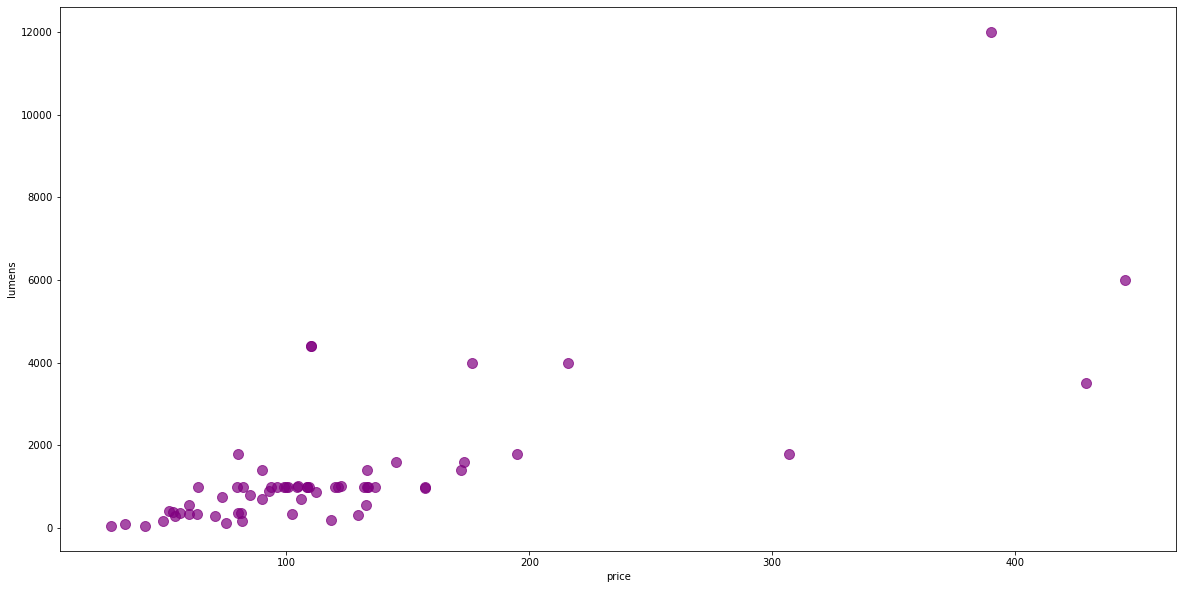

In [305]:
scatter_plot(df_final, 'price', 'lumens', 'label')

<AxesSubplot:xlabel='price', ylabel='lumens'>

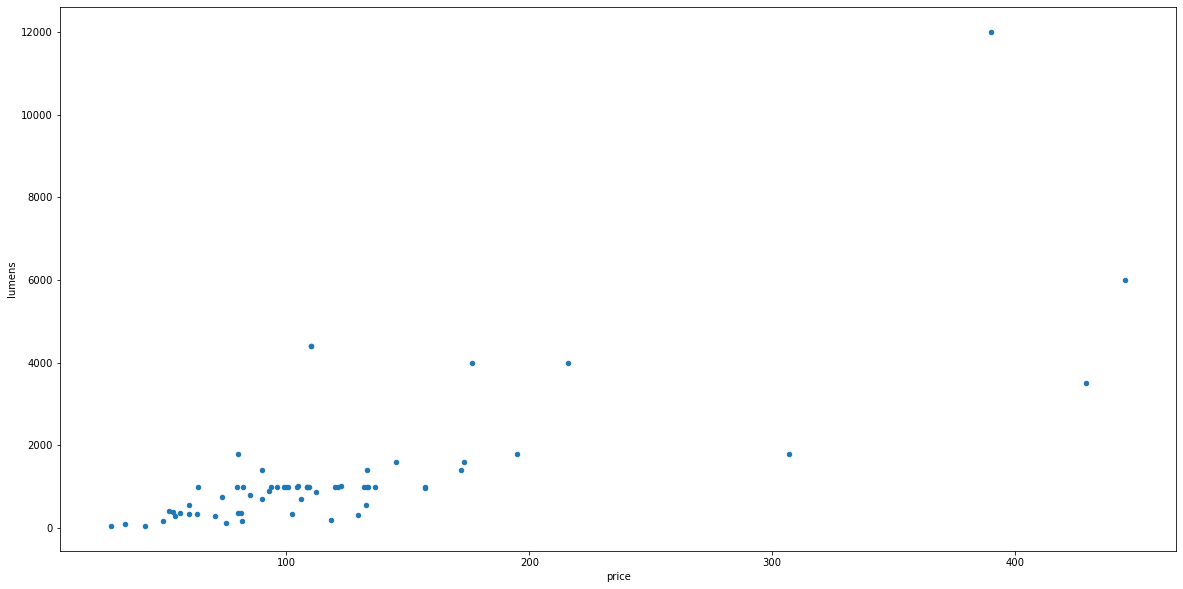

In [308]:
df_final.plot.scatter('price', 'lumens')

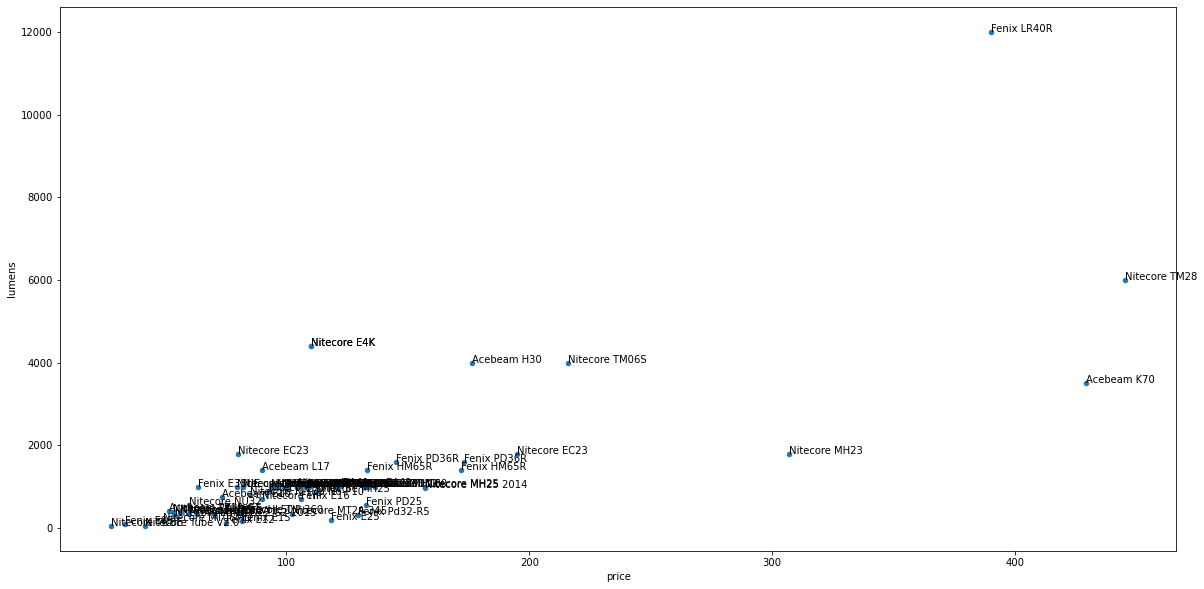

In [310]:
ax = df_final.plot(kind='scatter',x='price',y='lumens')
df_final[['price','lumens','label']].apply(lambda row: ax.text(*row),axis=1);

In [238]:
# name = df_products.sample(1)['product'].values[0]
# meta = df_products.sample(1)['meta'].values[0]

# print(name, '\n\n')
# print(meta)

# df_products = df_products.apply(get_brightness, axis=1).dropna()
    
# def get_brand(row):
#     ast.literal_eval(row.meta).get('brand',0) != 0:




# [ast.literal_eval(a).get('manufacturer') for a in df_products.meta.values]
# [ast.literal_eval(a).get('brand') for a in df_products.meta.values]
# [a for a in df_products.meta.values if ast.literal_eval(a).get('brightness') is not None]


# ast.literal_eval(df_products.sample(1).meta.values[0])
# df_products = df_products.apply(get_meta, axis=1)